# Capstone project assignment - Week 5

April 2020 - by Fen Jin

This work has the aim of showing some data from the COVID-19, especially in Italy.

I have gathered data from Protezione Civile, [GitHub page](https://github.com/pcm-dpc/COVID-19).

If you have other sources where I can get the data please let me know.


In [1]:
#Import needed modules

import os
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__)

#print(plt.style.available)
#mpl.style.use(['ggplot'])

Matplotlib version:  2.2.2


I have cloned the repository in my local computer.
I will analyse teh temporal changes of the provinces (/COVID-19-master/dati-province) with regards to the COVID-19 cases.

I want to import the single csv files into a single dataframe

In [2]:
data_path = os.path.curdir + '/COVID-19-master/dati-province/'

# files are named: dpc-covid19-ita-province-YYYYMMDD.csv
df = pd.read_csv(data_path + 'dpc-covid19-ita-province-20200229.csv')

for csv_file in os.listdir(data_path):    
    if(len(csv_file)==37): # there are some cvs files that are not daily updates
        #print(csv_file)
        temp = pd.read_csv(data_path + csv_file, parse_dates=["data"])
        df = pd.concat([df, temp], ignore_index=True, axis=0)
        

In [3]:
print('The dataframe has shape: ' + str(df.shape))
print()
print('The columns and datatypes are:')
df.info()

The dataframe has shape: (5376, 12)

The columns and datatypes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 12 columns):
data                       5376 non-null object
stato                      5376 non-null object
codice_regione             5376 non-null int64
denominazione_regione      5376 non-null object
codice_provincia           5376 non-null int64
denominazione_provincia    5376 non-null object
sigla_provincia            4452 non-null object
lat                        5376 non-null float64
long                       5376 non-null float64
totale_casi                5376 non-null int64
note_it                    3 non-null object
note_en                    3 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 504.1+ KB


Let's see some rows

In [4]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-29T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-29T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-29T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-29T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,2,NaN,NaN
4,2020-02-29T17:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


__Preprocess__
Let's modify the dataframe as we like.

- Let's remove some columns that we don't need
- Rename the columns in English
- Change date type form object type to datetime type
- Change the regions from 21 to 20
- Remove NaN values
- Change the cases from float type to int type

Let's remove some columns that we don't need

In [5]:
df.drop(columns=['stato', 'codice_regione', 'codice_provincia', 'note_it', 'note_en'], inplace=True)
df.head()

,data,denominazione_regione,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-29T17:00:00,Abruzzo,Chieti,CH,42.351032,14.167546,0
1,2020-02-29T17:00:00,Abruzzo,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-29T17:00:00,Abruzzo,Pescara,PE,42.464584,14.213648,0
3,2020-02-29T17:00:00,Abruzzo,Teramo,TE,42.658918,13.704400,2
4,2020-02-29T17:00:00,Abruzzo,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


Rename the columns in English

In [6]:
df.rename(columns={'data':'Date', 'denominazione_regione':'Region', 'denominazione_provincia':'Province', 'sigla_provincia':'Province Code', 'totale_casi':'Cases', 'lat':'Lat', 'long':'Long'}, inplace=True)
df.head()

,Date,Region,Province,Province Code,Lat,Long,Cases
0,2020-02-29T17:00:00,Abruzzo,Chieti,CH,42.351032,14.167546,0
1,2020-02-29T17:00:00,Abruzzo,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-29T17:00:00,Abruzzo,Pescara,PE,42.464584,14.213648,0
3,2020-02-29T17:00:00,Abruzzo,Teramo,TE,42.658918,13.704400,2
4,2020-02-29T17:00:00,Abruzzo,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


Convert the date from *object* type to *datetime* type

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d', exact=True)

In [8]:
df.dtypes

Date             datetime64[ns]
Region                   object
Province                 object
Province Code            object
Lat                     float64
Long                    float64
Cases                     int64
dtype: object

Now, let's remove the hours from the datetime, since we don't need

In [9]:
df.head()

,Date,Region,Province,Province Code,Lat,Long,Cases
0,2020-02-29 17:00:00,Abruzzo,Chieti,CH,42.351032,14.167546,0
1,2020-02-29 17:00:00,Abruzzo,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-29 17:00:00,Abruzzo,Pescara,PE,42.464584,14.213648,0
3,2020-02-29 17:00:00,Abruzzo,Teramo,TE,42.658918,13.704400,2
4,2020-02-29 17:00:00,Abruzzo,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


In [10]:
df['Date'] = df['Date'].dt.date

In [11]:
print('These data cover the situation for: ')
print(df['Date'].max() - df['Date'].min())

These data cover the situation for: 
40 days, 0:00:00


There should be 20 regions, in fact, *'P.A. Bolzano'* and *'P.A. Trento'* should be the same one (Trentino Alto Adige). 
Let's rename them.

In [12]:
print("Total number of regions: " + str(df['Region'].unique().size))
print()
print(df['Region'].unique())


Total number of regions: 21

['Abruzzo' 'Basilicata' 'P.A. Bolzano' 'Calabria' 'Campania'
 'Emilia-Romagna' 'Friuli Venezia Giulia' 'Lazio' 'Liguria' 'Lombardia'
 'Marche' 'Molise' 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia' 'Toscana'
 'P.A. Trento' 'Umbria' "Valle d'Aosta" 'Veneto']


In [13]:
# see which rows we should rename
df[(df['Region'] == 'P.A. Trento') | (df['Region'] == 'P.A. Bolzano')]

,Date,Region,Province,Province Code,Lat,Long,Cases
8,2020-02-29,P.A. Bolzano,Bolzano,BZ,46.499335,11.356624,1
9,2020-02-29,P.A. Bolzano,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
113,2020-02-29,P.A. Trento,Trento,TN,46.068935,11.121231,0
114,2020-02-29,P.A. Trento,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
136,2020-04-04,P.A. Bolzano,Bolzano,BZ,46.499335,11.356624,1592
137,2020-04-04,P.A. Bolzano,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
241,2020-04-04,P.A. Trento,Trento,TN,46.068935,11.121231,2220
242,2020-04-04,P.A. Trento,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
264,2020-02-29,P.A. Bolzano,Bolzano,BZ,46.499335,11.356624,1
265,2020-02-29,P.A. Bolzano,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


In [14]:
df.loc[(df['Region'] == 'P.A. Trento') | (df['Region'] == 'P.A. Bolzano'), ['Region']] = 'Trentino Alto Adige'

In [15]:
region_names = np.sort(list(df['Region'].unique()))
print(region_names)
len(region_names) # should be 20 now
# [print (type(x)) for x in region_names] # to check data type

['Abruzzo' 'Basilicata' 'Calabria' 'Campania' 'Emilia-Romagna'
 'Friuli Venezia Giulia' 'Lazio' 'Liguria' 'Lombardia' 'Marche' 'Molise'
 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia' 'Toscana' 'Trentino Alto Adige'
 'Umbria' "Valle d'Aosta" 'Veneto']


20

In [16]:
# now it should show no rows with region value as 'P.A. Trento' or 'P.A. Bolzano'
df[(df['Region'] == 'P.A. Trento') | (df['Region'] == 'P.A. Bolzano')]


,Date,Region,Province,Province Code,Lat,Long,Cases


There are some rows that have NaN values as Province Code, and the value in Province means : updating.

These should be discarded.

In [17]:
df.isnull().sum() # check how many

Date               0
Region             0
Province           0
Province Code    924
Lat                0
Long               0
Cases              0
dtype: int64

We notice that there is also one case of NaN value in the 'Cases' column. Let's see the respective row.

In [18]:
df[df['Cases'].isnull()] 

,Date,Region,Province,Province Code,Lat,Long,Cases


Now we drop all the rows that have NaN value in the 'Province Code' column, notice that the previous case of NaN value in the 'Cases' column is included as well.

In [19]:
df.dropna(axis=0, subset=['Province Code'], inplace=True)
df.isnull().sum() # check again that there are no NaN values anymore

Date             0
Region           0
Province         0
Province Code    0
Lat              0
Long             0
Cases            0
dtype: int64

Now we want to turn the 'Cases' columns' values into int type

In [20]:
df['Cases'] = df['Cases'].astype('int')
df.sort_values(by='Date', inplace=True)

Set the 'Date' as dataframe index column

In [21]:
df.set_index('Date', inplace=True)

In [22]:
df

,Region,Province,Province Code,Lat,Long,Cases
Date,,,,,,
2020-02-24,Marche,Fermo,FM,43.160585,13.718395,0
2020-02-24,Sicilia,Caltanissetta,CL,37.492132,14.061850,0
2020-02-24,Sicilia,Agrigento,AG,37.309711,13.584575,0
2020-02-24,Sardegna,Sud Sardegna,SU,39.166415,8.526243,0
2020-02-24,Sardegna,Sassari,SS,40.726677,8.559667,0
2020-02-24,Sardegna,Oristano,OR,39.903811,8.591183,0
2020-02-24,Sardegna,Nuoro,NU,40.323188,9.330296,0
2020-02-24,Sardegna,Cagliari,CA,39.215312,9.110616,0
2020-02-24,Puglia,Taranto,TA,40.473547,17.232372,0


In [23]:
# grouping the the data by Region first then by Date
regions = df[['Region', 'Province', 'Cases']].groupby(['Region','Date']).sum()
regions

Cases
Region  Date             
Abruzzo 2020-02-24      0
        2020-02-25      0
        2020-02-26      0
        2020-02-27      1
        2020-02-28      1
        2020-02-29      4
        2020-03-01      5
        2020-03-02      5
        2020-03-03      5
        2020-03-04      5
        2020-03-05      8
        2020-03-06      9
        2020-03-07     11
        2020-03-08     17
        2020-03-09     30
        2020-03-10     38
        2020-03-11     38
        2020-03-12     84
        2020-03-13     89
        2020-03-14    112
        2020-03-15    137
        2020-03-16    176
        2020-03-17    229
        2020-03-18    263
        2020-03-19    385
        2020-03-20    449
        2020-03-21    529
        2020-03-22    587
        2020-03-23    663
        2020-03-24    689
...                   ...
Veneto  2020-03-06    464
        2020-03-07    531
        2020-03-08    648
        2020-03-09    701
        2020-03-10    814
        2020-03-11    983
        2020-03-12   1256
        2020-03-13   1524
        2020-03-14   1813
        2020-03-15   2078
        2020-03-16   2363
        2020-03-17   2604
        2020-03-18   3091
        2020-03-19   3348
        2020-03-20   3883
        2020-03-21   4433
        2020-03-22   4923
        2020-03-23   5293
        2020-03-24   5719
        2020-03-25   6200
        2020-03-26   6675
        2020-03-27   7218
        2020-03-28   7666
        2020-03-29   8094
        2020-03-30   8448
        2020-03-31   8876
        2020-04-01   9367
        2020-04-02   9866
        2020-04-03  10212
        2020-04-04  10542

[820 rows x 1 columns]

__Visualize__

In [24]:
regions.loc['Lazio'] # try selecting one Region

,Cases
Date,
2020-02-24,0
2020-02-25,3
2020-02-26,3
2020-02-27,3
2020-02-28,3
2020-02-29,12
2020-03-01,6
2020-03-02,7
2020-03-03,14


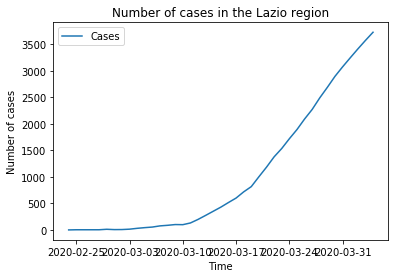

In [25]:
# simple plot of the Region selected
regions.loc['Lazio'].plot()

plt.title('Number of cases in the Lazio region')
plt.xlabel('Time')
plt.ylabel('Number of cases')

plt.show()

__Plots__

In [26]:
# Let's create a new dataframe with Regions and Dates only

regions_df = pd.DataFrame()
for idx, region in enumerate(region_names):
    #print(str(idx) + region)
    regions_df.insert(loc=idx ,column=region, value=regions.loc[region].Cases)

regions_df

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,Molise,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Trentino Alto Adige,Umbria,Valle d'Aosta,Veneto
Date,,,,,,,,,,,,,,,,,,,,
2020-02-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-25,0,0,0,0,26,0,3,1,235,0,0,3,0,0,3,2,1,0,0,38
2020-02-26,0,0,0,0,47,0,3,11,249,1,0,3,0,0,3,2,1,0,0,50
2020-02-27,1,0,0,0,97,0,3,19,391,3,0,2,1,0,4,2,1,0,0,98
2020-02-28,1,0,1,0,145,0,3,19,511,6,0,11,3,0,4,8,1,0,0,109
2020-02-29,4,0,2,0,434,0,12,84,1194,22,0,22,6,0,8,22,2,0,0,276
2020-03-01,5,0,1,0,285,6,6,22,961,25,0,49,3,0,4,13,1,2,0,177
2020-03-02,5,0,1,0,335,9,7,19,1076,35,0,51,4,0,4,13,1,2,0,269
2020-03-03,5,1,1,0,420,13,14,24,1484,61,3,56,6,1,4,19,5,2,0,302


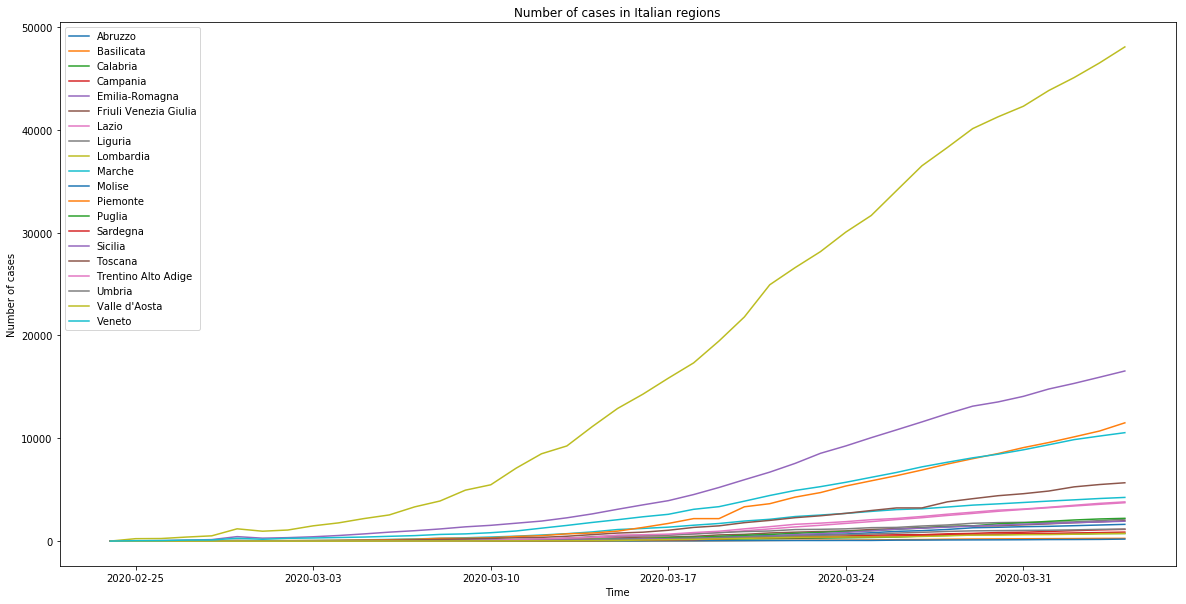

In [27]:
# plot all regions status day by day

regions_df.plot(kind='line',
               figsize=(20, 10))

plt.title('Number of cases in Italian regions')
plt.xlabel('Time')
plt.ylabel('Number of cases')

plt.show()

Let's add a 'Total' column to see the total every day in Italy

In [28]:
total_by_dates = regions_df.copy()
total_by_dates['Total'] = total_by_dates.sum(axis=1)

In [29]:
total_by_dates

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Trentino Alto Adige,Umbria,Valle d'Aosta,Veneto,Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25,0,0,0,0,26,0,3,1,235,0,...,3,0,0,3,2,1,0,0,38,312
2020-02-26,0,0,0,0,47,0,3,11,249,1,...,3,0,0,3,2,1,0,0,50,370
2020-02-27,1,0,0,0,97,0,3,19,391,3,...,2,1,0,4,2,1,0,0,98,622
2020-02-28,1,0,1,0,145,0,3,19,511,6,...,11,3,0,4,8,1,0,0,109,822
2020-02-29,4,0,2,0,434,0,12,84,1194,22,...,22,6,0,8,22,2,0,0,276,2088
2020-03-01,5,0,1,0,285,6,6,22,961,25,...,49,3,0,4,13,1,2,0,177,1560
2020-03-02,5,0,1,0,335,9,7,19,1076,35,...,51,4,0,4,13,1,2,0,269,1831
2020-03-03,5,1,1,0,420,13,14,24,1484,61,...,56,6,1,4,19,5,2,0,302,2421


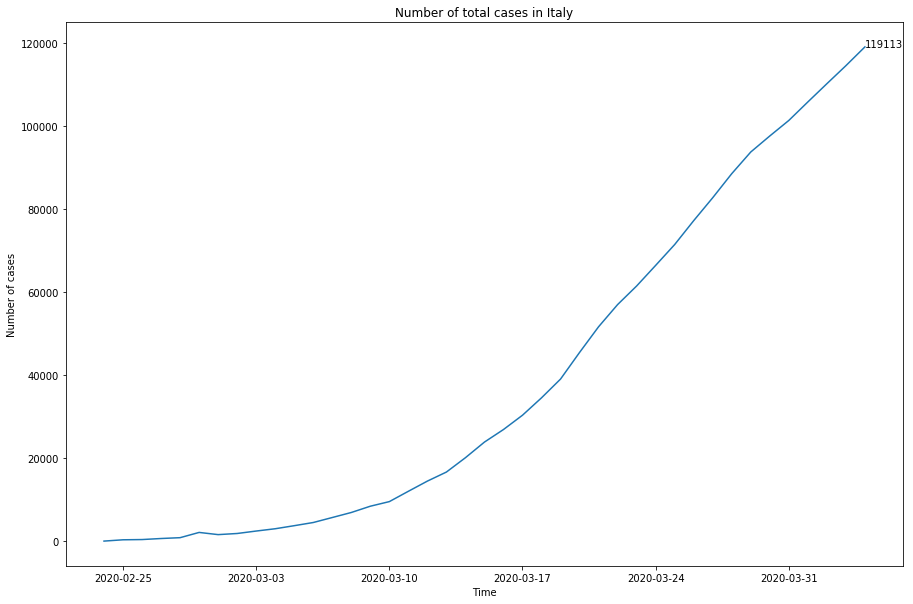

In [45]:
total_by_dates['Total'].plot(kind='line',
               figsize=(15, 10))

plt.title('Number of total cases in Italy')
plt.xlabel('Time')
plt.ylabel('Number of cases')

plt.annotate(total_by_dates['Total'][-1], xy=(dates[-1], total_by_dates['Total'][-1]), color='black')

plt.show()

Let's prepare the dataframe to see the top/least N regions with more/less cases.

In [31]:

total_by_reg = regions_df.T
dates = list(total_by_reg.columns) # have a list of the dates
total_by_reg

Date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Abruzzo,0,0,0,1,1,4,5,5,5,5,...,946,1017,1133,1293,1345,1401,1436,1497,1563,1628
Basilicata,0,0,0,0,0,0,0,0,1,1,...,134,151,182,202,214,226,237,246,261,264
Calabria,0,0,0,0,1,2,1,1,1,1,...,391,492,553,612,645,657,667,689,731,739
Campania,0,0,0,0,0,0,0,0,0,0,...,615,620,707,749,834,864,937,1015,1089,1142
Emilia-Romagna,0,26,47,97,145,434,285,335,420,543,...,10816,11588,12383,13119,13531,14074,14787,15333,15932,16540
Friuli Venezia Giulia,0,0,0,0,0,0,6,9,13,18,...,1215,1309,1429,1471,1492,1584,1676,1790,1873,1981
Lazio,0,3,3,3,3,12,6,7,14,30,...,2092,2273,2492,2691,2898,3077,3247,3414,3575,3730
Liguria,0,1,11,19,19,84,22,19,24,23,...,1331,1467,1568,1732,1795,1826,1830,1868,1990,2138
Lombardia,0,235,249,391,511,1194,961,1076,1484,1771,...,34082,36493,38266,40106,41253,42283,43810,45071,46492,48052
Marche,0,0,1,3,6,22,25,35,61,84,...,3063,3142,3312,3497,3619,3754,3889,4011,4140,4246


In [32]:
total_by_reg['Total'] = total_by_reg.sum(axis=1)

In [33]:
Italy_tot = total_by_reg['Total']

In [34]:
Italy_tot

Abruzzo                   18641
Basilicata                 2772
Calabria                   8584
Campania                  12622
Emilia-Romagna           224061
Friuli Venezia Giulia     24523
Lazio                     42783
Liguria                   28956
Lombardia                725097
Marche                    62603
Molise                     1949
Piemonte                 127875
Puglia                    24226
Sardegna                   9984
Sicilia                   21745
Toscana                   67239
Trentino Alto Adige       45261
Umbria                    14750
Valle d'Aosta              8921
Veneto                   141694
Name: Total, dtype: int64

In [35]:
n = 5

In [36]:
total_by_reg.sort_values(by='Total', ascending=False, axis=0, inplace=True)
total_by_reg

Date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,Total
Lombardia,0,235,249,391,511,1194,961,1076,1484,1771,...,36493,38266,40106,41253,42283,43810,45071,46492,48052,725097
Emilia-Romagna,0,26,47,97,145,434,285,335,420,543,...,11588,12383,13119,13531,14074,14787,15333,15932,16540,224061
Veneto,0,38,50,98,109,276,177,269,302,349,...,7218,7666,8094,8448,8876,9367,9866,10212,10542,141694
Piemonte,0,3,3,2,11,22,49,51,56,79,...,6910,7492,8012,8511,9090,9583,10135,10701,11499,127875
Toscana,0,2,2,2,8,22,13,13,19,38,...,3225,3817,4122,4412,4608,4867,5273,5499,5671,67239
Marche,0,0,1,3,6,22,25,35,61,84,...,3142,3312,3497,3619,3754,3889,4011,4140,4246,62603
Trentino Alto Adige,0,1,1,1,1,2,1,1,5,6,...,2394,2614,2808,3007,3117,3288,3482,3668,3812,45261
Lazio,0,3,3,3,3,12,6,7,14,30,...,2273,2492,2691,2898,3077,3247,3414,3575,3730,42783
Liguria,0,1,11,19,19,84,22,19,24,23,...,1467,1568,1732,1795,1826,1830,1868,1990,2138,28956
Friuli Venezia Giulia,0,0,0,0,0,0,6,9,13,18,...,1309,1429,1471,1492,1584,1676,1790,1873,1981,24523


In [37]:
top_n_reg = total_by_reg.head(n)
top_n_reg

Date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,Total
Lombardia,0,235,249,391,511,1194,961,1076,1484,1771,...,36493,38266,40106,41253,42283,43810,45071,46492,48052,725097
Emilia-Romagna,0,26,47,97,145,434,285,335,420,543,...,11588,12383,13119,13531,14074,14787,15333,15932,16540,224061
Veneto,0,38,50,98,109,276,177,269,302,349,...,7218,7666,8094,8448,8876,9367,9866,10212,10542,141694
Piemonte,0,3,3,2,11,22,49,51,56,79,...,6910,7492,8012,8511,9090,9583,10135,10701,11499,127875
Toscana,0,2,2,2,8,22,13,13,19,38,...,3225,3817,4122,4412,4608,4867,5273,5499,5671,67239


In [38]:
top_n_reg[dates]

Date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Lombardia,0,235,249,391,511,1194,961,1076,1484,1771,...,34082,36493,38266,40106,41253,42283,43810,45071,46492,48052
Emilia-Romagna,0,26,47,97,145,434,285,335,420,543,...,10816,11588,12383,13119,13531,14074,14787,15333,15932,16540
Veneto,0,38,50,98,109,276,177,269,302,349,...,6675,7218,7666,8094,8448,8876,9367,9866,10212,10542
Piemonte,0,3,3,2,11,22,49,51,56,79,...,6361,6910,7492,8012,8511,9090,9583,10135,10701,11499
Toscana,0,2,2,2,8,22,13,13,19,38,...,3225,3225,3817,4122,4412,4608,4867,5273,5499,5671


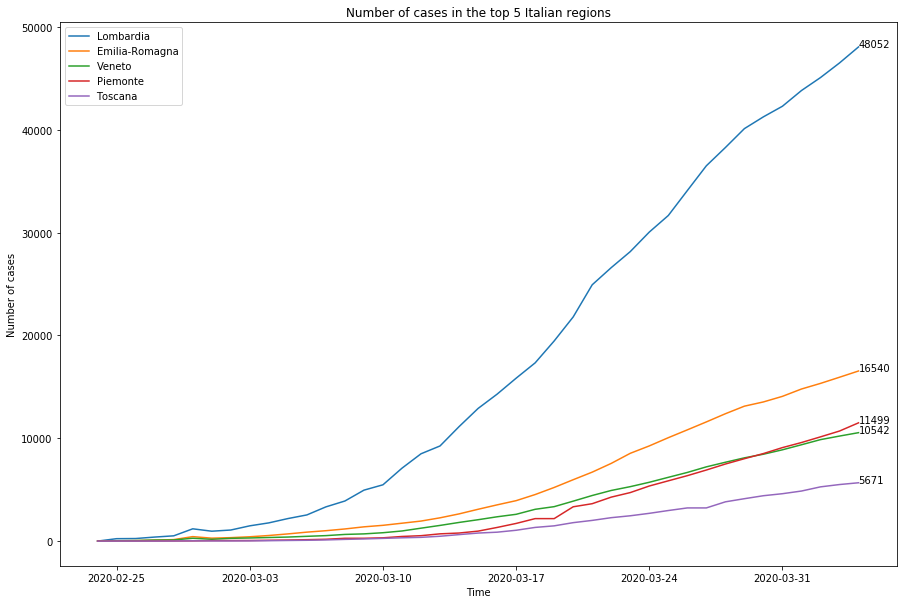

In [39]:
top_n_reg[dates].T.plot(kind='line',
               figsize=(15, 10))

plt.title('Number of cases in the top {:d} Italian regions'.format(n))
plt.xlabel('Time')
plt.ylabel('Number of cases')

for idx, value in enumerate(top_n_reg[dates[-1]]):
    plt.annotate(value, xy=(dates[-1], value), color='black')

plt.show()


In [40]:
least_n_reg = total_by_reg.tail(n)
least_n_reg

Date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,Total
Sardegna,0,0,0,0,0,0,0,0,1,2,...,530,624,638,682,722,745,794,825,874,9984
Valle d'Aosta,0,0,0,0,0,0,0,0,0,0,...,452,511,584,584,628,631,668,719,748,8921
Calabria,0,0,0,0,1,2,1,1,1,1,...,492,553,612,645,657,667,689,731,739,8584
Basilicata,0,0,0,0,0,0,0,0,1,1,...,151,182,202,214,226,237,246,261,264,2772
Molise,0,0,0,0,0,0,0,0,3,3,...,100,110,117,123,133,149,153,164,194,1949


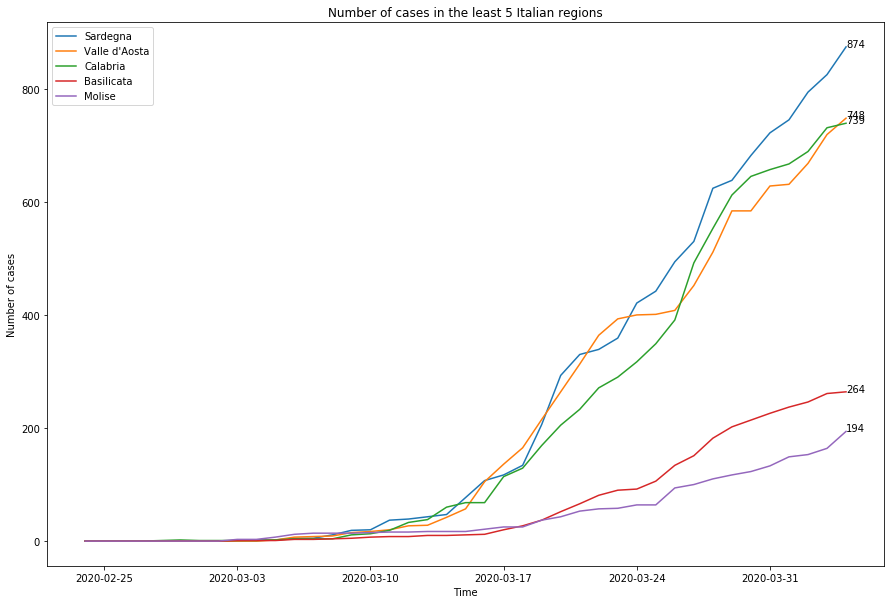

In [41]:
least_n_reg[dates].T.plot(kind='line',
               figsize=(15, 10))

plt.title('Number of cases in the least {:d} Italian regions'.format(n))
plt.xlabel('Time')
plt.ylabel('Number of cases')

for idx, value in enumerate(least_n_reg[dates[-1]]):
    plt.annotate(value, xy=(dates[-1], value), color='black')

plt.show()

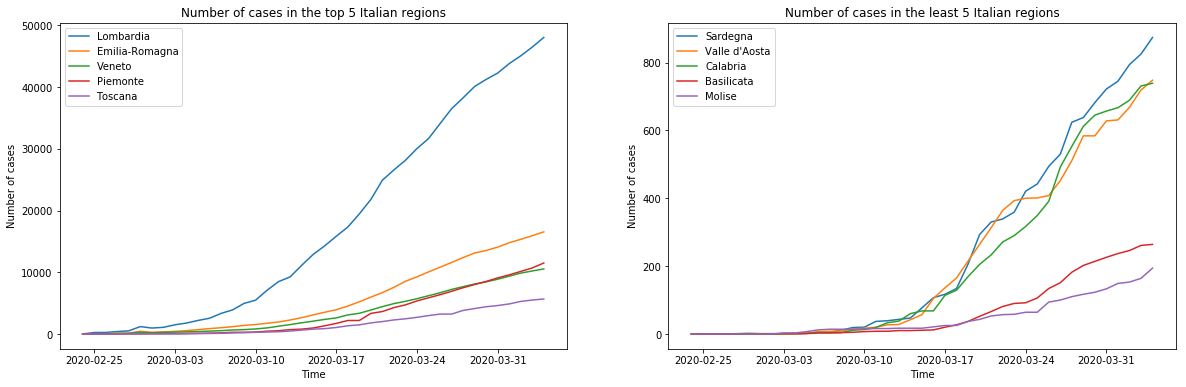

In [43]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: top_n plot
top_n_reg[dates].T.plot(kind='line', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Number of cases in the top {:d} Italian regions'.format(n))
ax0.set_xlabel('Time')
ax0.set_ylabel('Number of cases')

# Subplot 2: least_n plot
least_n_reg[dates].T.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Number of cases in the least {:d} Italian regions'.format(n))
ax1.set_ylabel('Number of cases')
ax1.set_xlabel('Time')

#ax1.set_ylim(ax0.get_ylim())

plt.show()